In [2]:
from google.colab import files

# Upload file
uploaded = files.upload()

Saving ProcessedData.csv to ProcessedData.csv


Successfully loaded ProcessedData.csv.

=== DATAFRAME HEAD ===
   Unnamed: 0 ProjectID  ProjectStatus  \
0           0       NaN            NaN   
1           1       NaN            NaN   
2           2       NaN            NaN   
3           3       NaN            NaN   
4           4       NaN            NaN   

                                        ProjectTitle  ProjectRDC  \
0  The Effect of Oil News Shocks on Job Creation ...         NaN   
1  CTC and ACTC Participation Results and IRS-Cen...         NaN   
2  EITC Participation Results and IRS-Census Matc...         NaN   
3  The Census Historical Environmental Impacts Frame         NaN   
4  Exploratory Report: Annual Business Survey Own...         NaN   

   ProjectStartYear  ProjectEndYear  \
0               NaN             NaN   
1               NaN             NaN   
2               NaN             NaN   
3               NaN             NaN   
4               NaN             NaN   

                                        

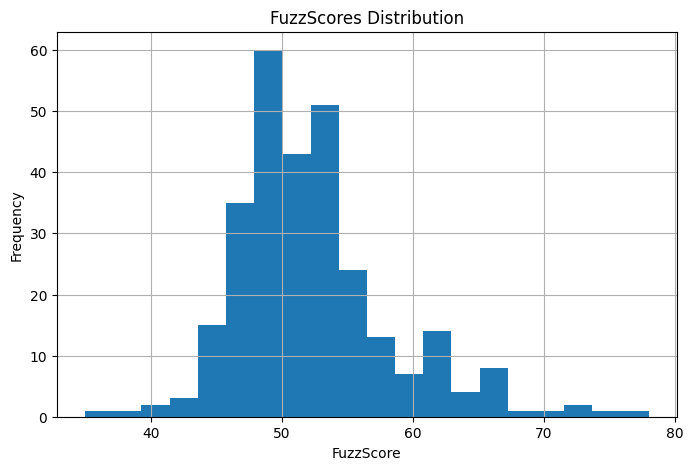

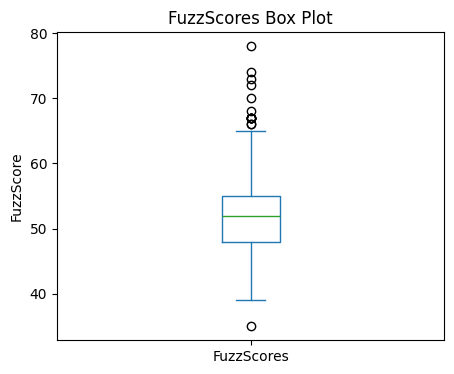

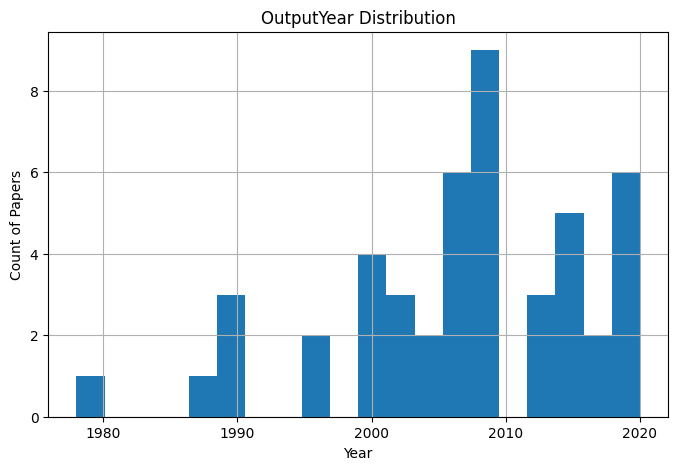

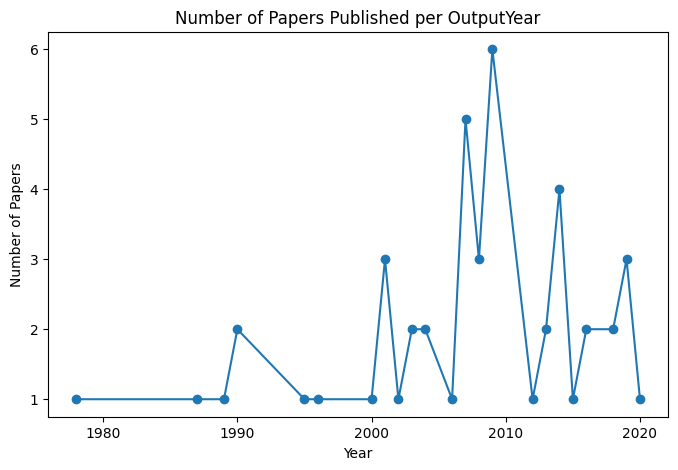

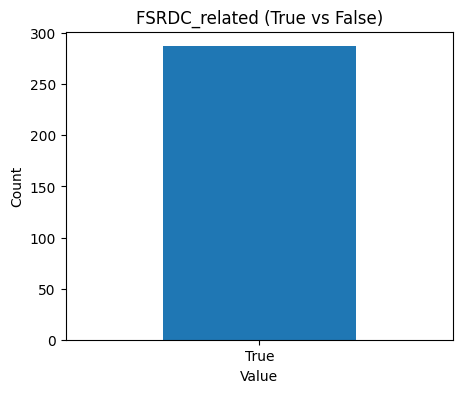


[SKIP] No 'dataname' column found.

=== STEP 5 ANALYSIS COMPLETE ===
Generated numeric summaries and plots for available columns.
If certain plots did not display, the corresponding columns may be missing or empty.


In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats  # For correlation, t-tests, etc.

def run_step5_analysis(csv_file: str = "ProcessedData.csv"):
    """
    Perform Step 5: Data Analysis & Visualization.

    This function:
      1. Loads the final curated CSV.
      2. Prints an overview of the data (head, info, descriptive stats, missing values).
      3. Generates various plots for relevant columns, such as:
         - Histograms and box plots for numeric columns (e.g., citations, FuzzScores).
         - Bar charts for categorical columns (e.g., FSRDC_related, dataname).
         - Time-series line charts (e.g., OutputYear or year).
      4. (Optional) Performs advanced statistics if data is available.

    If a column is missing or empty, its plots are skipped.

    :param csv_file: Path or filename of the final curated CSV.
    """
    # 1. LOAD DATA
    try:
        df = pd.read_csv(csv_file)
        print(f"Successfully loaded {csv_file}.")
    except FileNotFoundError:
        print(f"ERROR: {csv_file} not found. Please ensure the file is uploaded or the path is correct.")
        return

    # 2. BASIC OVERVIEW
    print("\n=== DATAFRAME HEAD ===")
    print(df.head())

    print("\n=== DATAFRAME INFO ===")
    df.info()

    print("\n=== DESCRIPTIVE STATISTICS (NUMERIC COLUMNS) ===")
    print(df.describe(include=[np.number]))

    print("\n=== MISSING VALUES PER COLUMN ===")
    missing_vals = df.isnull().sum()
    print(missing_vals)

    # ---------------------------------------------------------------------
    # 3. VISUALIZATIONS / STATISTICS FOR SPECIFIC COLUMNS
    # ---------------------------------------------------------------------

    # 3A. CITATIONS (Histogram, Box Plot, Correlation, T-test)
    if 'citations' in df.columns:
        df['citations'] = pd.to_numeric(df['citations'], errors='coerce')
        valid_citations = df['citations'].dropna()
        if not valid_citations.empty:
            plt.figure(figsize=(8, 5))
            valid_citations.hist(bins=30)
            plt.title("Citation Count Distribution")
            plt.xlabel("Citations")
            plt.ylabel("Frequency")
            plt.show()

            plt.figure(figsize=(5, 4))
            valid_citations.plot(kind='box')
            plt.title("Citation Count Box Plot")
            plt.ylabel("Citations")
            plt.show()
        else:
            print("\nNo valid numeric data in 'citations' to plot.")
    else:
        print("\n[SKIP] 'citations' column not found in this CSV.")

    # 3B. FUZZSCORES (Histogram, Box Plot)
    if 'FuzzScores' in df.columns:
        df['FuzzScores'] = pd.to_numeric(df['FuzzScores'], errors='coerce')
        valid_fuzz = df['FuzzScores'].dropna()
        if not valid_fuzz.empty:
            plt.figure(figsize=(8, 5))
            valid_fuzz.hist(bins=20)
            plt.title("FuzzScores Distribution")
            plt.xlabel("FuzzScore")
            plt.ylabel("Frequency")
            plt.show()

            plt.figure(figsize=(5, 4))
            valid_fuzz.plot(kind='box')
            plt.title("FuzzScores Box Plot")
            plt.ylabel("FuzzScore")
            plt.show()
        else:
            print("\nNo valid numeric data in 'FuzzScores' to plot.")
    else:
        print("\n[SKIP] 'FuzzScores' column not found in this CSV.")

    # 3C. OUTPUTYEAR or YEAR (Histogram, Line Chart)
    year_col_name = None
    if 'OutputYear' in df.columns:
        year_col_name = 'OutputYear'
    elif 'year' in df.columns:
        year_col_name = 'year'

    if year_col_name:
        df[year_col_name] = pd.to_numeric(df[year_col_name], errors='coerce')
        valid_years = df[year_col_name].dropna()
        if not valid_years.empty:
            plt.figure(figsize=(8, 5))
            valid_years.hist(bins=20)
            plt.title(f"{year_col_name} Distribution")
            plt.xlabel("Year")
            plt.ylabel("Count of Papers")
            plt.show()

            year_counts = valid_years.value_counts().sort_index()
            plt.figure(figsize=(8, 5))
            year_counts.plot(marker='o')
            plt.title(f"Number of Papers Published per {year_col_name}")
            plt.xlabel("Year")
            plt.ylabel("Number of Papers")
            plt.show()
        else:
            print(f"\nNo valid numeric data in '{year_col_name}' to plot.")
    else:
        print("\n[SKIP] No 'OutputYear' or 'year' column found.")

    # 3D. FSRDC_related (Bar Chart)
    if 'FSRDC_related' in df.columns:
        if df['FSRDC_related'].dtype != bool:
            try:
                df['FSRDC_related'] = df['FSRDC_related'].astype(bool)
            except ValueError:
                print("\nCould not convert 'FSRDC_related' to bool; skipping bar chart.")
                df['FSRDC_related'] = None
        fsrdc_counts = df['FSRDC_related'].value_counts(dropna=False)
        if not fsrdc_counts.empty:
            plt.figure(figsize=(5, 4))
            fsrdc_counts.plot(kind='bar')
            plt.title("FSRDC_related (True vs False)")
            plt.xlabel("Value")
            plt.ylabel("Count")
            plt.xticks(rotation=0)
            plt.show()
        else:
            print("\n'FSRDC_related' column is present but empty.")
    else:
        print("\n[SKIP] No 'FSRDC_related' column found.")

    # 3E. DATANAME (Bar Chart) - If applicable
    if 'dataname' in df.columns:
        valid_data = df['dataname'].dropna()
        if not valid_data.empty:
            plt.figure(figsize=(10, 5))
            valid_data.value_counts().plot(kind='bar')
            plt.title("Dataset Usage (dataname)")
            plt.xlabel("Dataset Name")
            plt.ylabel("Count of Papers")
            plt.xticks(rotation=45, ha='right')
            plt.tight_layout()
            plt.show()
        else:
            print("\n'dataname' column is present but empty.")
    else:
        print("\n[SKIP] No 'dataname' column found.")

    # 3F. ADVANCED STATISTICS (Optional)
    if ('citations' in df.columns) and (year_col_name is not None):
        valid_merge = df[[year_col_name, 'citations']].dropna()
        if len(valid_merge) > 1:
            r_value, p_value = stats.pearsonr(valid_merge[year_col_name], valid_merge['citations'])
            print(f"\n=== PEARSON CORRELATION: {year_col_name} vs. citations ===")
            print(f"r = {r_value:.4f}, p = {p_value:.4e}")

            older_group = valid_merge.loc[valid_merge[year_col_name] < 2015, 'citations']
            newer_group = valid_merge.loc[valid_merge[year_col_name] >= 2015, 'citations']
            if len(older_group) > 1 and len(newer_group) > 1:
                t_stat, p_val = stats.ttest_ind(older_group, newer_group, equal_var=False)
                print("\n=== TWO-SAMPLE T-TEST (Older vs Newer Citations) ===")
                print(f"t-statistic = {t_stat:.4f}, p-value = {p_val:.4e}")
                print(f"Mean Citations (Older <2015): {older_group.mean():.2f}")
                print(f"Mean Citations (Newer >=2015): {newer_group.mean():.2f}")
            else:
                print("\nNot enough data in older/newer subsets for a two-sample t-test.")
        else:
            print("\nNot enough data for correlation or t-test on year vs. citations.")

    print("\n=== STEP 5 ANALYSIS COMPLETE ===")
    print("Generated numeric summaries and plots for available columns.")
    print("If certain plots did not display, the corresponding columns may be missing or empty.")

# To run the analysis, simply call the function:
run_step5_analysis("ProcessedData.csv")


IndentationError: unexpected indent (<ipython-input-10-5389b0a494f7>, line 2)